exploration

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/Othercomputers/My laptop/datasets_di_bc/Apple Stock Prices (1981 to 2023).csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Preview the dataset
print(df.head())
print(df.info())

         Date      Open      High       Low     Close  Adj Close    Volume
0  02/01/1981  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1  05/01/1981  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
2  06/01/1981  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
3  07/01/1981  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
4  08/01/1981  0.135603  0.135603  0.135045  0.135045   0.105085  39827200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB
None


In [4]:
# Check for null values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
print(df['Date'].dtype)

object


In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [9]:
print(df['Date'].dtype)      # Should be datetime64[ns]
print(df['Date'].head())     # Should show real datetime objects

datetime64[ns]
0   1981-01-02
1   1981-01-05
2   1981-01-06
3   1981-01-07
4   1981-01-08
Name: Date, dtype: datetime64[ns]


In [10]:
# Confirm time series regularity
print(df.index.to_series().diff().value_counts())

1.0    10607
Name: count, dtype: int64


visualisation

In [11]:
import matplotlib.pyplot as plt

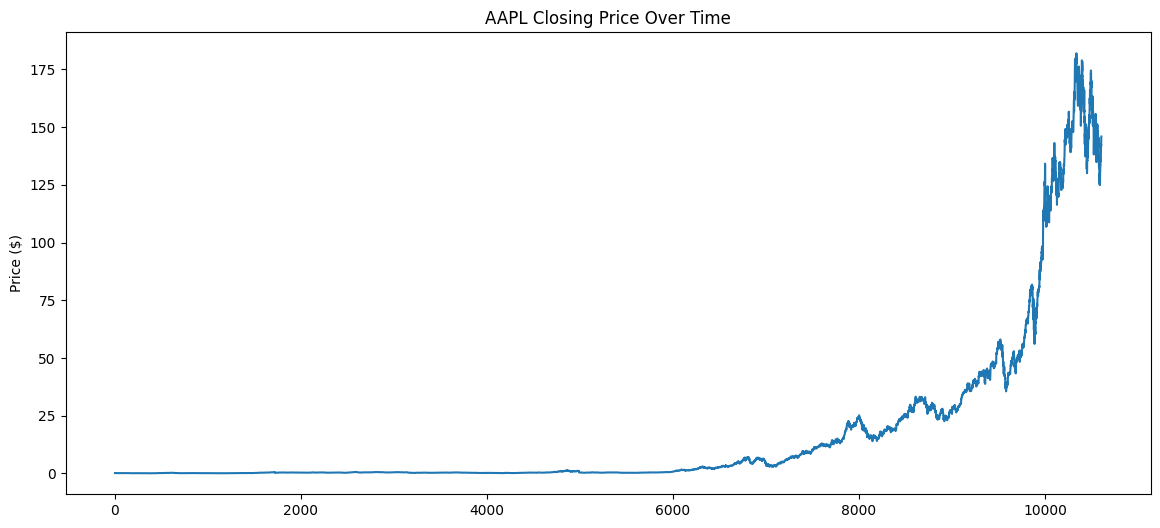

In [12]:
# Plot Closing Price
df['Close'].plot(figsize=(14,6), title='AAPL Closing Price Over Time')
plt.ylabel("Price ($)")
plt.show()

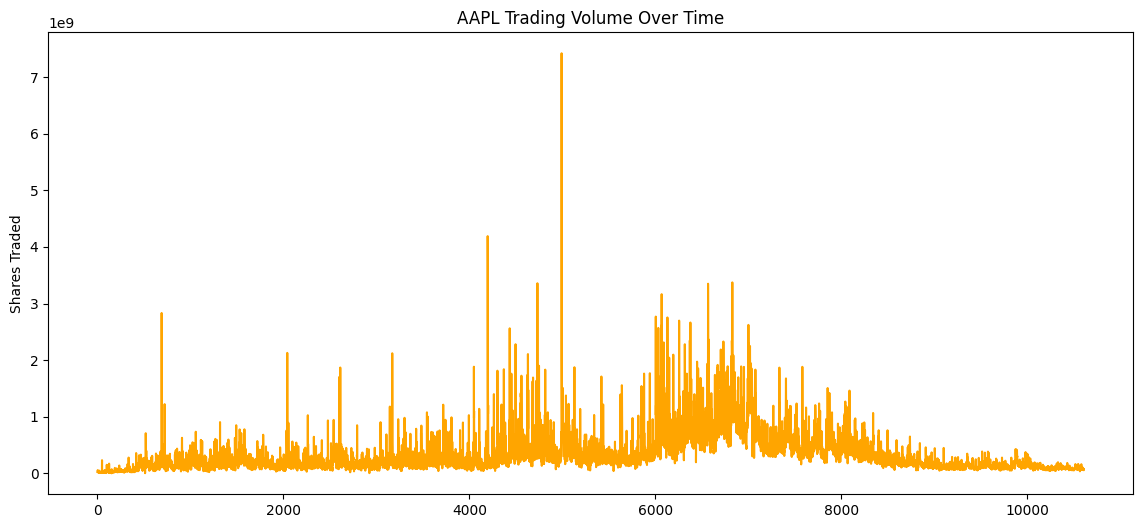

In [13]:
# Plot Volume
df['Volume'].plot(figsize=(14,6), color='orange', title='AAPL Trading Volume Over Time')
plt.ylabel("Shares Traded")
plt.show()

In [16]:
# Candlestick chart (recent 100 days for readability)
mpf.plot(df[-100:], type='candle', volume=True, title='AAPL Candlestick Chart (Last 100 Days)')

TypeError: Expect data.index as DatetimeIndex

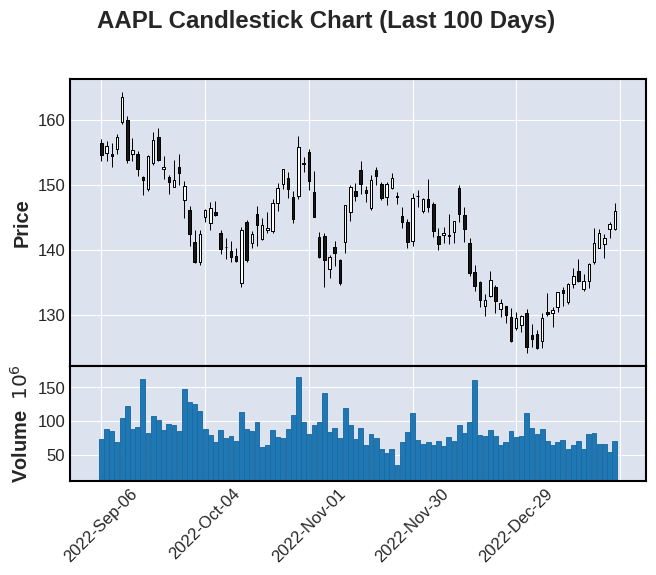

In [17]:
# Set the 'Date' column as the index
df = df.set_index('Date')

# Candlestick chart (recent 100 days for readability)
import mplfinance as mpf
mpf.plot(df[-100:], type='candle', volume=True, title='AAPL Candlestick Chart (Last 100 Days)')

statistic analysis

In [19]:
# Columns to analyze
key_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Compute summary statistics for key columns
summary_statistics = df[key_columns].describe()

print("\nSummary Statistics for Key Columns:")
print(summary_statistics)

# Alternatively, you can compute individual statistics
print("\nMean of Key Columns:")
print(df[key_columns].mean())

print("\nMedian of Key Columns:")
print(df[key_columns].median())

print("\nStandard Deviation of Key Columns:")
print(df[key_columns].std())


Summary Statistics for Key Columns:
               Open          High           Low         Close     Adj Close  \
count  10608.000000  10608.000000  10608.000000  10608.000000  10608.000000   
mean      16.689173     16.879955     16.500822     16.697362     16.027345   
std       35.450519     35.882848     35.031289     35.473912     35.154878   
min        0.049665      0.049665      0.049107      0.049107      0.038213   
25%        0.287946      0.296875      0.282355      0.288923      0.238909   
50%        0.488839      0.495536      0.480446      0.487701      0.404851   
75%       16.320893     16.418483     16.151249     16.269554     14.073167   
max      182.630005    182.940002    179.119995    182.009995    180.959747   

             Volume  
count  1.060800e+04  
mean   3.275098e+08  
std    3.378203e+08  
min    0.000000e+00  
25%    1.213044e+08  
50%    2.145976e+08  
75%    4.066804e+08  
max    7.421641e+09  

Mean of Key Columns:
Open         1.668917e+01
High 

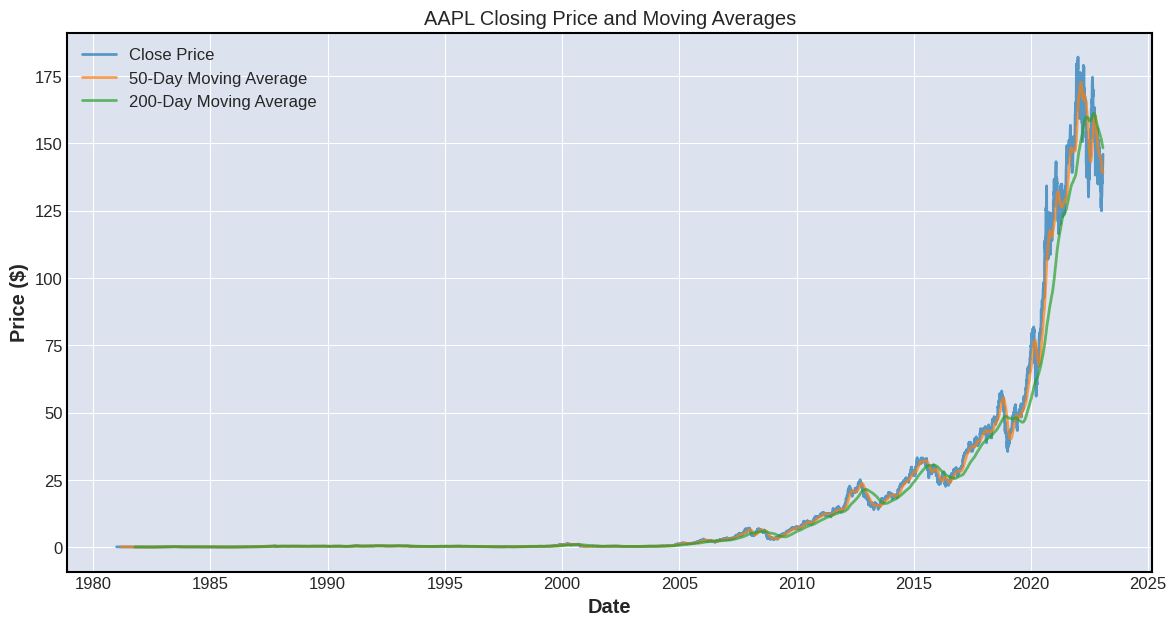

<ipython-input-20-d195e1a7f158>:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][50:] = (df['MA_50'][50:] > df['MA_200'][50:]).astype(float)
<ipython-input-20-d195e1a7f158>:24: SettingWithCopyWarning: 
A value is trying to be s

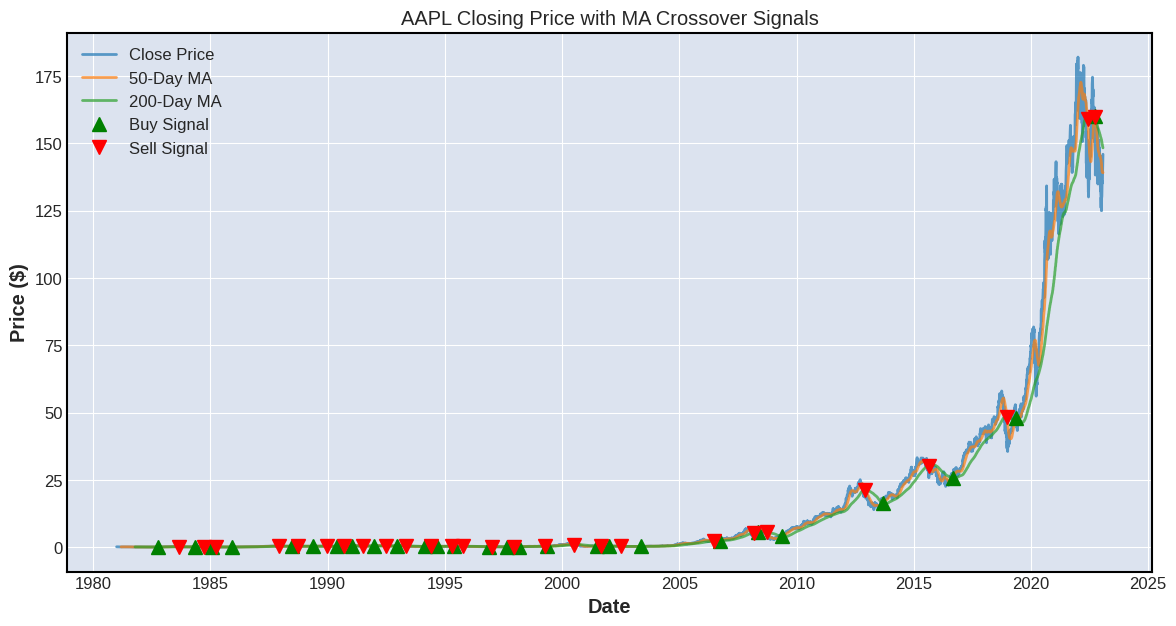

In [20]:
import matplotlib.pyplot as plt
# Analyze Closing Prices with Moving Average
# Calculate the 50-day moving average for the 'Close' price
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Calculate the 200-day moving average for the 'Close' price
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Plot the Close price and the moving averages
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.7)
plt.plot(df.index, df['MA_50'], label='50-Day Moving Average', alpha=0.7)
plt.plot(df.index, df['MA_200'], label='200-Day Moving Average', alpha=0.7)
plt.title('AAPL Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Generate buy/sell signals based on moving average crossover (optional)
# Simple example: Buy when 50-day MA crosses above 200-day MA
df['Signal'] = 0.0
df['Signal'][50:] = (df['MA_50'][50:] > df['MA_200'][50:]).astype(float)
df['Position'] = df['Signal'].diff()

# Plot the Close price and signals
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.7)
plt.plot(df.index, df['MA_50'], label='50-Day MA', alpha=0.7)
plt.plot(df.index, df['MA_200'], label='200-Day MA', alpha=0.7)

# Plot buy signals
plt.plot(df.loc[df['Position'] == 1.0].index,
         df['MA_50'][df['Position'] == 1.0],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot sell signals
plt.plot(df.loc[df['Position'] == -1.0].index,
         df['MA_50'][df['Position'] == -1.0],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('AAPL Closing Price with MA Crossover Signals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

hypothesis testing

In [23]:
from scipy import stats

In [24]:
# Daily returns
df['Daily_Return'] = df['Close'].pct_change().dropna()

In [26]:
# Compare average close in two years
# Use .loc to correctly slice by year from the DatetimeIndex and then select the 'Close' column
mean_2020 = df.loc['2020', 'Close']
mean_2021 = df.loc['2021', 'Close']
t_stat, p_val = stats.ttest_ind(mean_2020, mean_2021, nan_policy='omit')
print(f"T-test (2020 vs 2021): t={t_stat:.4f}, p={p_val:.4f}")

T-test (2020 vs 2021): t=-27.5886, p=0.0000


In [27]:
# Test if daily returns are normally distributed
stat, p = stats.normaltest(df['Daily_Return'].dropna())
print(f"Normality test for daily returns: stat={stat:.4f}, p={p:.4f}")

Normality test for daily returns: stat=2719.2053, p=0.0000


numpy

In [28]:
import numpy as np

# Custom moving average with convolution
kernel = np.ones(20) / 20
df['MA20_custom'] = np.convolve(df['Close'], kernel, mode='same')

# Correlation between MA20 and Volume
valid = df[['MA20', 'Volume']].dropna()
correlation = np.corrcoef(valid['MA20'], valid['Volume'])[0, 1]
print(f"Correlation (MA20 & Volume): {correlation:.4f}")

Correlation (MA20 & Volume): -0.2147
